<a href="https://colab.research.google.com/github/Dilrose747/Monopoly-Strategy-Advisor/blob/main/Monopoly_Strategy_Advisor_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import random

# Define a simplified Monopoly board (40 squares)
board = [
    "Go", "Mediterranean Avenue", "Community Chest", "Baltic Avenue", "Income Tax", "Reading Railroad",
    "Oriental Avenue", "Chance", "Vermont Avenue", "Connecticut Avenue", "Jail",
    "St. Charles Place", "Electric Company", "States Avenue", "Virginia Avenue", "Pennsylvania Railroad",
    "St. James Place", "Community Chest", "Tennessee Avenue", "New York Avenue", "Free Parking",
    "Kentucky Avenue", "Chance", "Indiana Avenue", "Illinois Avenue", "B&O Railroad",
    "Atlantic Avenue", "Ventnor Avenue", "Water Works", "Marvin Gardens", "Go to Jail",
    "Pacific Avenue", "North Carolina Avenue", "Community Chest", "Pennsylvania Avenue", "Short Line",
    "Chance", "Park Place", "Luxury Tax", "Boardwalk"
]

# Function to simulate one game with N players and T turns
def simulate_multiplayer_monopoly(turns=50, players=4, starting_cash=1500):
    board_size = 40
    positions = [0] * players
    cashes = [starting_cash] * players
    owned_properties = [set() for _ in range(players)]
    data = []

    for turn in range(1, turns + 1):
        for player in range(players):
            dice = random.randint(1, 6) + random.randint(1, 6)
            positions[player] = (positions[player] + dice) % board_size
            pos = positions[player]
            square = board[pos]
            action = "None"
            result = 0

            if "Avenue" in square or "Railroad" in square or "Company" in square:
                price = 100 + (10 * pos % 100)
                already_owned = any(pos in props for props in owned_properties)

                if not already_owned and cashes[player] >= price:
                    action = "Buy"
                    cashes[player] -= price
                    owned_properties[player].add(pos)
                    result = -price
                elif already_owned:
                    for i, props in enumerate(owned_properties):
                        if pos in props and i != player:
                            rent = 50
                            if cashes[player] >= rent:
                                cashes[player] -= rent
                                cashes[i] += rent
                                action = f"Pay Rent to P{i+1}"
                                result = -rent
                            else:
                                action = "Bankrupt"
                                result = -cashes[player]
                                cashes[player] = 0
                            break
            elif "Tax" in square:
                tax = 100
                cashes[player] -= tax
                action = "Pay Tax"
                result = -tax
            elif "Go to Jail" in square:
                positions[player] = 10
                action = "Go to Jail"
                result = 0
            elif "Chance" in square or "Community Chest" in square:
                chance_result = random.choice([-100, 50, 0])
                cashes[player] += chance_result
                action = "Card Draw"
                result = chance_result

            data.append({
                "Turn": turn,
                "Player": f"P{player + 1}",
                "Position": pos,
                "Square": square,
                "Cash": cashes[player],
                "Owned_Properties": list(owned_properties[player]),
                "Dice_Roll": dice,
                "Action": action,
                "Result": result
            })

    return pd.DataFrame(data)

# Simulate 100 games of 4-player Monopoly, each with 50 turns per player
all_games = []
for game_id in range(1, 101):
    df_game = simulate_multiplayer_monopoly(players=4, turns=50)
    df_game["Game_ID"] = game_id
    all_games.append(df_game)

# Combine all games into one dataset
df_large_simulation = pd.concat(all_games, ignore_index=True)

# Save to CSV
df_large_simulation.to_csv("monopoly_large_simulation.csv", index=False)

print("✅ Simulation complete! Data saved as 'monopoly_large_simulation.csv'")


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving monopoly_large_simulation.csv to monopoly_large_simulation.csv


In [ ]:
import pandas as pd

df = pd.read_csv("monopoly_large_simulation.csv")
print(df.head())


   Turn Player  Position            Square  Cash Owned_Properties  Dice_Roll  \
0     1     P1         5  Reading Railroad  1350              [5]          5   
1     1     P2         7            Chance  1550               []          7   
2     1     P3         6   Oriental Avenue  1340              [6]          6   
3     1     P4         5  Reading Railroad  1450               []          5   
4     2     P1        10              Jail  1400              [5]          5   

           Action  Result  Game_ID  
0             Buy    -150        1  
1       Card Draw      50        1  
2             Buy    -160        1  
3  Pay Rent to P1     -50        1  
4             NaN       0        1  


In [ ]:
pip install pandas matplotlib seaborn


📌 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Turn              20000 non-null  int64 
 1   Player            20000 non-null  object
 2   Position          20000 non-null  int64 
 3   Square            20000 non-null  object
 4   Cash              20000 non-null  int64 
 5   Owned_Properties  20000 non-null  object
 6   Dice_Roll         20000 non-null  int64 
 7   Action            13048 non-null  object
 8   Result            20000 non-null  int64 
 9   Game_ID           20000 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 1.5+ MB
None

📌 First 5 rows:
   Turn Player  Position            Square  Cash Owned_Properties  Dice_Roll  \
0     1     P1         5  Reading Railroad  1350              [5]          5   
1     1     P2         7            Chance  1550               []          7   
2     1    

<ipython-input-9-1384c9f2b7ee>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_squares.values, y=top_squares.index, palette="viridis")


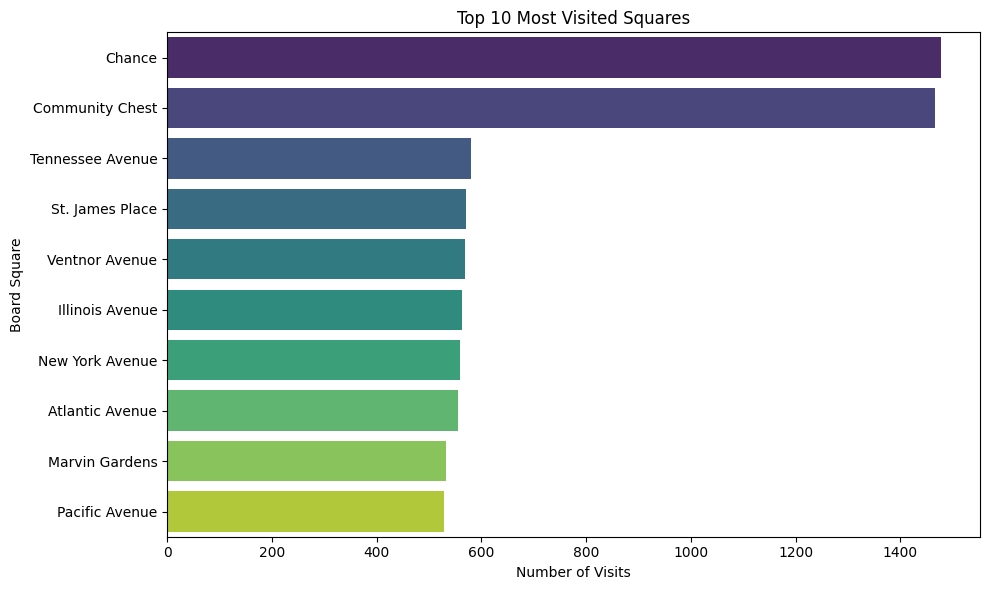

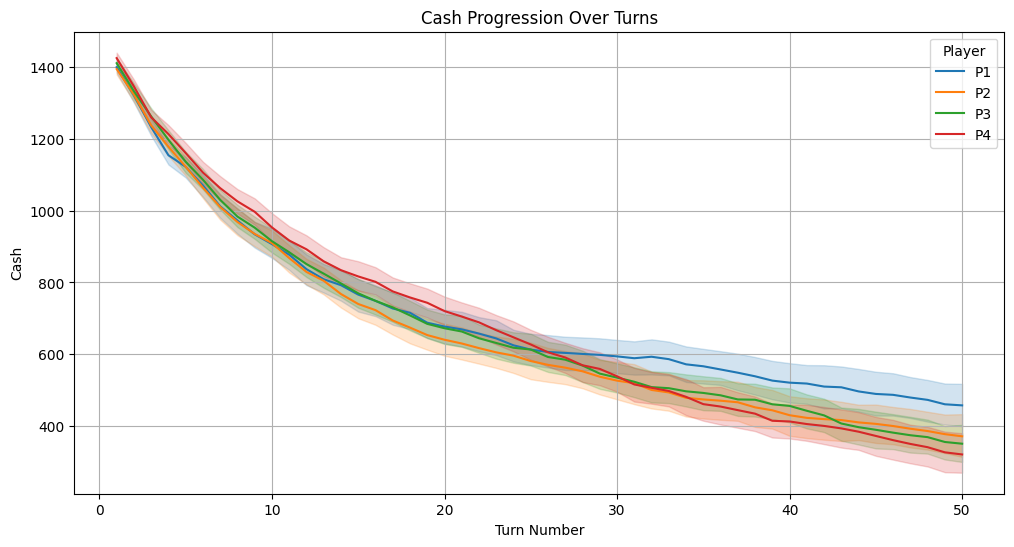

<ipython-input-9-1384c9f2b7ee>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=action_counts.index, y=action_counts.values, palette="Set2")


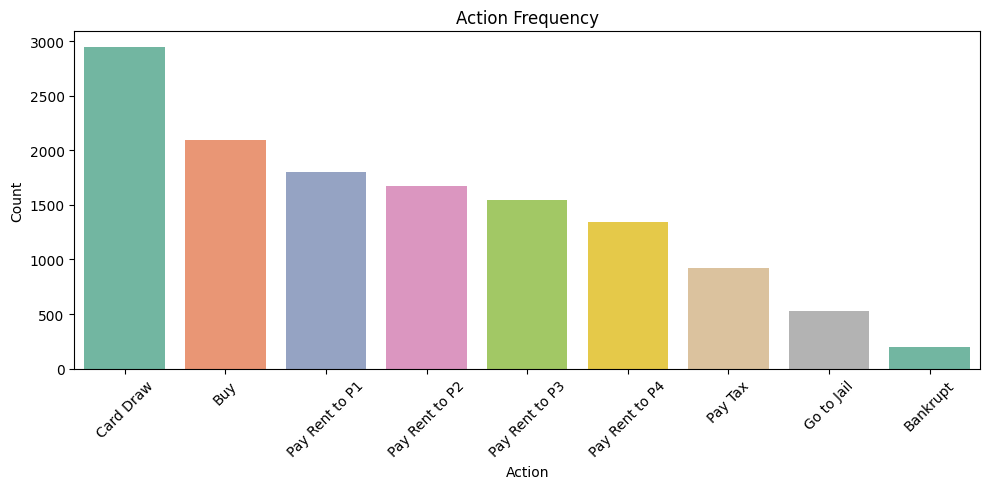

<ipython-input-9-1384c9f2b7ee>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=summary, x="Player", y="Cash", palette="pastel")


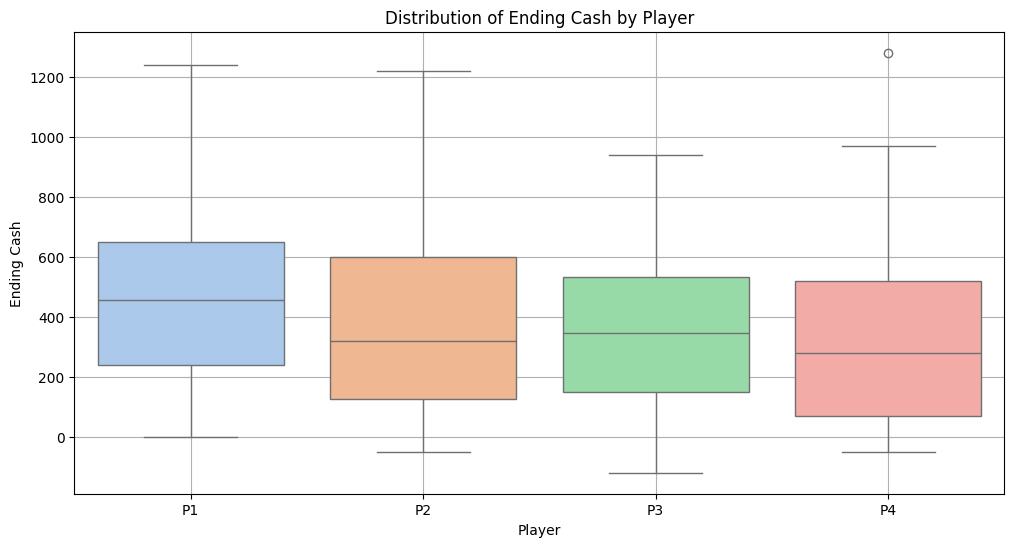

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("monopoly_large_simulation.csv")

# Display basic info
print("📌 Dataset Info:")
print(df.info())

# Preview the data
print("\n📌 First 5 rows:")
print(df.head())

# Convert Turn and Position to categorical for grouping
df["Turn"] = df["Turn"].astype(int)
df["Position"] = df["Position"].astype(int)

# 🔹 1. Most Visited Squares
top_squares = df["Square"].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_squares.values, y=top_squares.index, palette="viridis")
plt.title("Top 10 Most Visited Squares")
plt.xlabel("Number of Visits")
plt.ylabel("Board Square")
plt.tight_layout()
plt.show()

# 🔹 2. Cash Over Time by Player
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Turn", y="Cash", hue="Player")
plt.title("Cash Progression Over Turns")
plt.ylabel("Cash")
plt.xlabel("Turn Number")
plt.legend(title="Player")
plt.grid(True)
plt.show()

# 🔹 3. Action Frequency
plt.figure(figsize=(10, 5))
action_counts = df["Action"].value_counts()
sns.barplot(x=action_counts.index, y=action_counts.values, palette="Set2")
plt.title("Action Frequency")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 🔹 4. Ending Cash by Game and Player
last_turns = df[df["Turn"] == df["Turn"].max()]
summary = last_turns.groupby(["Game_ID", "Player"])["Cash"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.boxplot(data=summary, x="Player", y="Cash", palette="pastel")
plt.title("Distribution of Ending Cash by Player")
plt.ylabel("Ending Cash")
plt.xlabel("Player")
plt.grid(True)
plt.show()


In [ ]:
from collections import Counter
from itertools import product
import numpy as np
import pandas as pd

# Dice roll probabilities (2 to 12)
dice_probs = Counter(sum(p) for p in product(range(1, 7), repeat=2))
total = sum(dice_probs.values())
dice_probs = {k: v / total for k, v in dice_probs.items()}


In [ ]:
N = 40  # 40 positions on the board
transition_matrix = np.zeros((N, N))

for start in range(N):
    for roll, prob in dice_probs.items():
        end = (start + roll) % N
        transition_matrix[start][end] += prob


In [ ]:
def adjust_special_squares(matrix):
    jail_pos = 10
    go_to_jail_pos = 30
    chance_positions = [7, 22, 36]
    community_positions = [2, 17, 33]

    # Handle Go To Jail
    matrix[go_to_jail_pos] = 0
    matrix[go_to_jail_pos][jail_pos] = 1.0

    # Approximate Chance (10% chance to move to a different square)
    for pos in chance_positions:
        matrix[pos] *= 0.9
        matrix[pos][0] += 0.05  # "Go"
        matrix[pos][jail_pos] += 0.05  # "Go to Jail"

    # Approximate Community Chest (10% chance of moving)
    for pos in community_positions:
        matrix[pos] *= 0.9
        matrix[pos][0] += 0.05
        matrix[pos][jail_pos] += 0.05

    return matrix

transition_matrix = adjust_special_squares(transition_matrix)


In [ ]:
# Initial distribution: player starts at Go (0)
state = np.zeros(N)
state[0] = 1.0

# After N turns
N_turns = 20
for _ in range(N_turns):
    state = np.dot(state, transition_matrix)

# Convert to DataFrame for visualization
landing_probs = pd.DataFrame({
    "Square": range(40),
    "Probability": state
}).sort_values(by="Probability", ascending=False)

print("🔝 Top 10 most frequently landed squares:")
print(landing_probs.head(10))


🔝 Top 10 most frequently landed squares:
    Square  Probability
10      10     0.049850
21      21     0.030405
20      20     0.030372
22      22     0.030328
25      25     0.030264
24      24     0.030237
19      19     0.030231
18      18     0.030100
23      23     0.030071
26      26     0.030031


<ipython-input-14-3d4d2159b739>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=landing_probs, x="Square", y="Probability", palette="coolwarm")


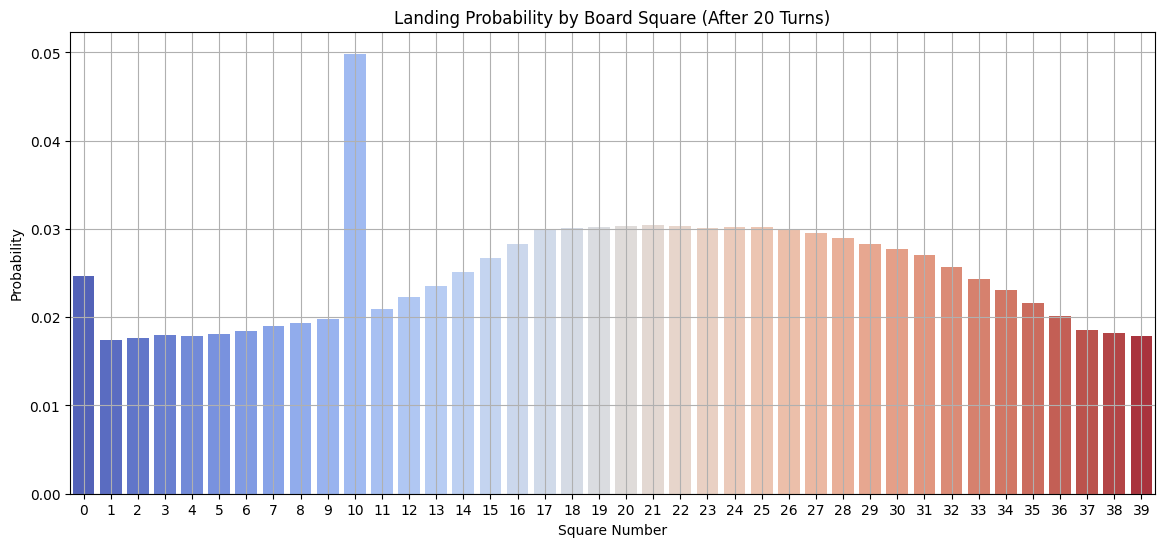

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.barplot(data=landing_probs, x="Square", y="Probability", palette="coolwarm")
plt.title("Landing Probability by Board Square (After 20 Turns)")
plt.xlabel("Square Number")
plt.ylabel("Probability")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# 1. Buildable color properties
buildable_properties = pd.DataFrame({
    "Name": [
        "Mediterranean Avenue", "Baltic Avenue", "Oriental Avenue", "Vermont Avenue", "Connecticut Avenue",
        "St. Charles Place", "States Avenue", "Virginia Avenue", "St. James Place", "Tennessee Avenue", "New York Avenue",
        "Kentucky Avenue", "Indiana Avenue", "Illinois Avenue", "Atlantic Avenue", "Ventnor Avenue", "Marvin Gardens",
        "Pacific Avenue", "North Carolina Avenue", "Pennsylvania Avenue", "Park Place", "Boardwalk"
    ],
    "Position": [
        1, 3, 6, 8, 9, 11, 13, 14, 16, 18, 19, 21, 23, 24, 26, 27, 29,
        31, 32, 34, 37, 39
    ],
    "Type": ["Color"] * 22,
    "Cost": [
        60, 60, 100, 100, 120, 140, 140, 160, 180, 180, 200, 220, 220, 240, 260, 260, 280,
        300, 300, 320, 350, 400
    ],
    "Base_Rent": [
        2, 4, 6, 6, 8, 10, 10, 12, 14, 14, 16, 18, 18, 20, 22, 22, 24,
        26, 26, 28, 35, 50
    ],
    "House1": [10, 20, 30, 30, 40, 50, 50, 60, 70, 70, 80, 90, 90, 100, 110, 110, 120, 130, 130, 150, 175, 200],
    "House2": [30, 60, 90, 90, 100, 150, 150, 180, 200, 200, 220, 250, 250, 300, 330, 330, 360, 390, 390, 450, 500, 600],
    "House3": [90, 180, 270, 270, 300, 450, 450, 500, 550, 550, 600, 700, 700, 750, 800, 800, 850, 900, 900, 1000, 1100, 1400],
    "House4": [160, 320, 400, 400, 450, 625, 625, 700, 750, 750, 800, 875, 875, 900, 950, 950, 1000, 1100, 1100, 1200, 1300, 1700],
    "Hotel": [250, 450, 550, 550, 600, 750, 750, 900, 950, 950, 1000, 1050, 1050, 1100, 1150, 1150, 1200, 1275, 1275, 1400, 1500, 2000],
    "House_Cost": [50]*5 + [100]*6 + [150]*6 + [200]*5
})

# 2. Railroads
railroads = pd.DataFrame({
    "Name": ["Reading Railroad", "Pennsylvania Railroad", "B&O Railroad", "Short Line"],
    "Position": [5, 15, 25, 35],
    "Type": ["Railroad"] * 4,
    "Cost": [200] * 4,
    "Base_Rent": [25] * 4,
    "House1": [0] * 4,
    "House2": [0] * 4,
    "House3": [0] * 4,
    "House4": [0] * 4,
    "Hotel": [0] * 4,
    "House_Cost": [0] * 4
})

# 3. Utilities
utilities = pd.DataFrame({
    "Name": ["Electric Company", "Water Works"],
    "Position": [12, 28],
    "Type": ["Utility"] * 2,
    "Cost": [150] * 2,
    "Base_Rent": [0] * 2,  # Rent depends on dice roll
    "House1": [0] * 2,
    "House2": [0] * 2,
    "House3": [0] * 2,
    "House4": [0] * 2,
    "Hotel": [0] * 2,
    "House_Cost": [0] * 2
})

# Combine all into a master DataFrame
all_properties = pd.concat([buildable_properties, railroads, utilities], ignore_index=True)

# Show summary
print("Total properties:", len(all_properties))
print(all_properties.head(10))


Total properties: 28
                   Name  Position   Type  Cost  Base_Rent  House1  House2  \
0  Mediterranean Avenue         1  Color    60          2      10      30   
1         Baltic Avenue         3  Color    60          4      20      60   
2       Oriental Avenue         6  Color   100          6      30      90   
3        Vermont Avenue         8  Color   100          6      30      90   
4    Connecticut Avenue         9  Color   120          8      40     100   
5     St. Charles Place        11  Color   140         10      50     150   
6         States Avenue        13  Color   140         10      50     150   
7       Virginia Avenue        14  Color   160         12      60     180   
8       St. James Place        16  Color   180         14      70     200   
9      Tennessee Avenue        18  Color   180         14      70     200   

   House3  House4  Hotel  House_Cost  
0      90     160    250          50  
1     180     320    450          50  
2     270     

Total properties: 28
                   Name  Position   Type  Cost  Base_Rent  House1  House2  \
0  Mediterranean Avenue         1  Color    60          2      10      30   
1         Baltic Avenue         3  Color    60          4      20      60   
2       Oriental Avenue         6  Color   100          6      30      90   
3        Vermont Avenue         8  Color   100          6      30      90   
4    Connecticut Avenue         9  Color   120          8      40     100   
5     St. Charles Place        11  Color   140         10      50     150   
6         States Avenue        13  Color   140         10      50     150   
7       Virginia Avenue        14  Color   160         12      60     180   
8       St. James Place        16  Color   180         14      70     200   
9      Tennessee Avenue        18  Color   180         14      70     200   

   House3  House4  Hotel  House_Cost  
0      90     160    250          50  
1     180     320    450          50  
2     270     

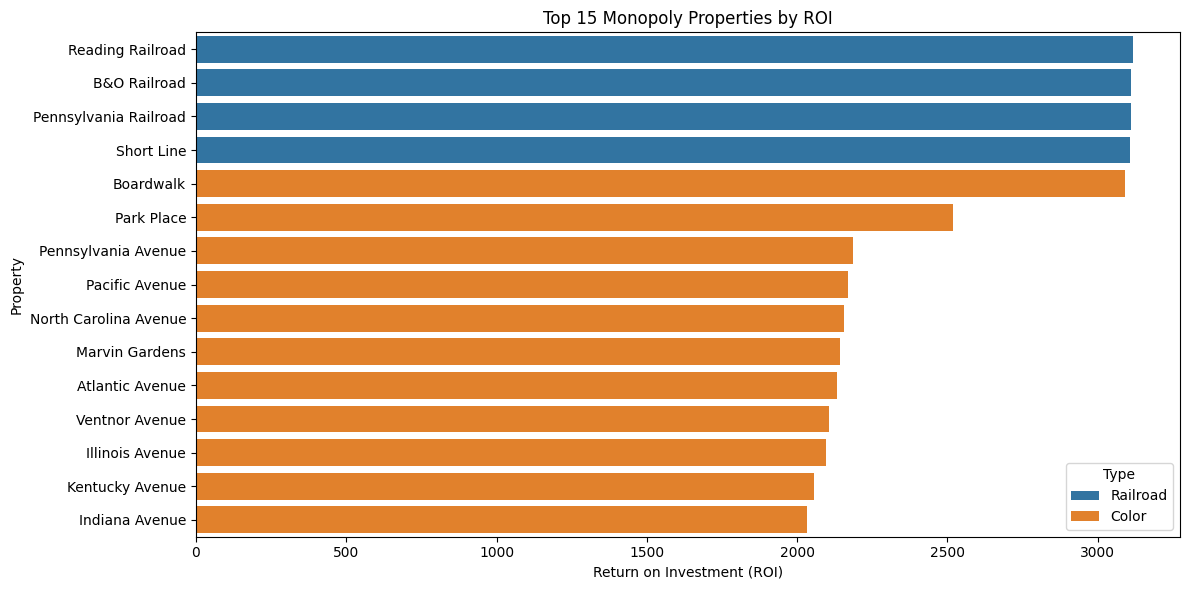

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Combine full Monopoly property data

import pandas as pd

# 1. Buildable color properties
buildable_properties = pd.DataFrame({
    "Name": [
        "Mediterranean Avenue", "Baltic Avenue", "Oriental Avenue", "Vermont Avenue", "Connecticut Avenue",
        "St. Charles Place", "States Avenue", "Virginia Avenue", "St. James Place", "Tennessee Avenue", "New York Avenue",
        "Kentucky Avenue", "Indiana Avenue", "Illinois Avenue", "Atlantic Avenue", "Ventnor Avenue", "Marvin Gardens",
        "Pacific Avenue", "North Carolina Avenue", "Pennsylvania Avenue", "Park Place", "Boardwalk"
    ],
    "Position": [
        1, 3, 6, 8, 9, 11, 13, 14, 16, 18, 19, 21, 23, 24, 26, 27, 29,
        31, 32, 34, 37, 39
    ],
    "Type": ["Color"] * 22,
    "Cost": [
        60, 60, 100, 100, 120, 140, 140, 160, 180, 180, 200, 220, 220, 240, 260, 260, 280,
        300, 300, 320, 350, 400
    ],
    "Base_Rent": [
        2, 4, 6, 6, 8, 10, 10, 12, 14, 14, 16, 18, 18, 20, 22, 22, 24,
        26, 26, 28, 35, 50
    ],
    "House1": [10, 20, 30, 30, 40, 50, 50, 60, 70, 70, 80, 90, 90, 100, 110, 110, 120, 130, 130, 150, 175, 200],
    "House2": [30, 60, 90, 90, 100, 150, 150, 180, 200, 200, 220, 250, 250, 300, 330, 330, 360, 390, 390, 450, 500, 600],
    "House3": [90, 180, 270, 270, 300, 450, 450, 500, 550, 550, 600, 700, 700, 750, 800, 800, 850, 900, 900, 1000, 1100, 1400],
    "House4": [160, 320, 400, 400, 450, 625, 625, 700, 750, 750, 800, 875, 875, 900, 950, 950, 1000, 1100, 1100, 1200, 1300, 1700],
    "Hotel": [250, 450, 550, 550, 600, 750, 750, 900, 950, 950, 1000, 1050, 1050, 1100, 1150, 1150, 1200, 1275, 1275, 1400, 1500, 2000],
    "House_Cost": [50]*5 + [100]*6 + [150]*6 + [200]*5
})

# 2. Railroads
railroads = pd.DataFrame({
    "Name": ["Reading Railroad", "Pennsylvania Railroad", "B&O Railroad", "Short Line"],
    "Position": [5, 15, 25, 35],
    "Type": ["Railroad"] * 4,
    "Cost": [200] * 4,
    "Base_Rent": [25] * 4,
    "House1": [0] * 4,
    "House2": [0] * 4,
    "House3": [0] * 4,
    "House4": [0] * 4,
    "Hotel": [0] * 4,
    "House_Cost": [0] * 4
})

# 3. Utilities
utilities = pd.DataFrame({
    "Name": ["Electric Company", "Water Works"],
    "Position": [12, 28],
    "Type": ["Utility"] * 2,
    "Cost": [150] * 2,
    "Base_Rent": [0] * 2,  # Rent depends on dice roll
    "House1": [0] * 2,
    "House2": [0] * 2,
    "House3": [0] * 2,
    "House4": [0] * 2,
    "Hotel": [0] * 2,
    "House_Cost": [0] * 2
})

# Combine all into a master DataFrame
properties = pd.concat([buildable_properties, railroads, utilities], ignore_index=True)

# Show summary
print("Total properties:", len(properties))
print(properties.head(10))

# 2. Simulate landing probabilities (Monte Carlo)
np.random.seed(42)
n_turns = 1_000_000
position_counts = np.zeros(40)
pos = 0

for _ in range(n_turns):
    dice = np.random.randint(1, 7) + np.random.randint(1, 7)
    pos = (pos + dice) % 40
    position_counts[pos] += 1

landing_probs = position_counts / n_turns
properties["Landing_Prob"] = properties["Position"].map(lambda x: landing_probs[x])

# 3. Compute ROI
properties["Expected_Rent"] = properties["Base_Rent"] * properties["Landing_Prob"] * n_turns
properties["ROI"] = properties["Expected_Rent"] / properties["Cost"]

# 4. Sort and display top-performing properties
top_properties = properties.sort_values("ROI", ascending=False)

print("\nTop 10 Properties by ROI:\n")
print(top_properties[["Name", "Type", "ROI", "Expected_Rent", "Cost"]].head(10))

# 5. Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=top_properties.head(15), x="ROI", y="Name", hue="Type", dodge=False)
plt.title("Top 15 Monopoly Properties by ROI")
plt.xlabel("Return on Investment (ROI)")
plt.ylabel("Property")
plt.tight_layout()
plt.show()


Total properties: 28
                   Name  Position   Type  Cost  Base_Rent  House1  House2  \
0  Mediterranean Avenue         1  Color    60          2      10      30   
1         Baltic Avenue         3  Color    60          4      20      60   
2       Oriental Avenue         6  Color   100          6      30      90   
3        Vermont Avenue         8  Color   100          6      30      90   
4    Connecticut Avenue         9  Color   120          8      40     100   
5     St. Charles Place        11  Color   140         10      50     150   
6         States Avenue        13  Color   140         10      50     150   
7       Virginia Avenue        14  Color   160         12      60     180   
8       St. James Place        16  Color   180         14      70     200   
9      Tennessee Avenue        18  Color   180         14      70     200   

   House3  House4  Hotel  House_Cost  
0      90     160    250          50  
1     180     320    450          50  
2     270     

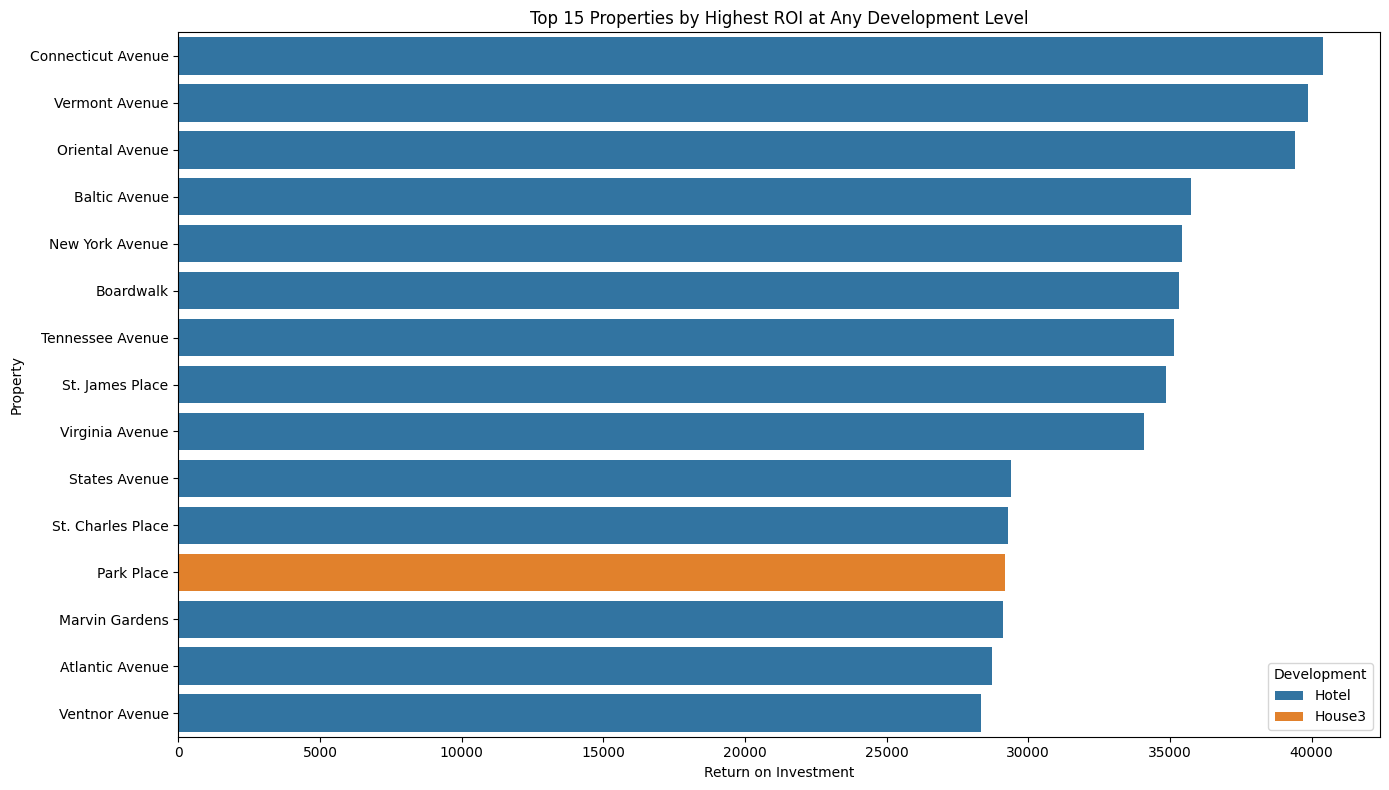

In [ ]:
# Full ROI simulation including houses/hotels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Buildable color properties
buildable_properties = pd.DataFrame({
    "Name": [
        "Mediterranean Avenue", "Baltic Avenue", "Oriental Avenue", "Vermont Avenue", "Connecticut Avenue",
        "St. Charles Place", "States Avenue", "Virginia Avenue", "St. James Place", "Tennessee Avenue", "New York Avenue",
        "Kentucky Avenue", "Indiana Avenue", "Illinois Avenue", "Atlantic Avenue", "Ventnor Avenue", "Marvin Gardens",
        "Pacific Avenue", "North Carolina Avenue", "Pennsylvania Avenue", "Park Place", "Boardwalk"
    ],
    "Position": [
        1, 3, 6, 8, 9, 11, 13, 14, 16, 18, 19, 21, 23, 24, 26, 27, 29,
        31, 32, 34, 37, 39
    ],
    "Type": ["Color"] * 22,
    "Cost": [
        60, 60, 100, 100, 120, 140, 140, 160, 180, 180, 200, 220, 220, 240, 260, 260, 280,
        300, 300, 320, 350, 400
    ],
    "Base_Rent": [
        2, 4, 6, 6, 8, 10, 10, 12, 14, 14, 16, 18, 18, 20, 22, 22, 24,
        26, 26, 28, 35, 50
    ],
    "House1": [10, 20, 30, 30, 40, 50, 50, 60, 70, 70, 80, 90, 90, 100, 110, 110, 120, 130, 130, 150, 175, 200],
    "House2": [30, 60, 90, 90, 100, 150, 150, 180, 200, 200, 220, 250, 250, 300, 330, 330, 360, 390, 390, 450, 500, 600],
    "House3": [90, 180, 270, 270, 300, 450, 450, 500, 550, 550, 600, 700, 700, 750, 800, 800, 850, 900, 900, 1000, 1100, 1400],
    "House4": [160, 320, 400, 400, 450, 625, 625, 700, 750, 750, 800, 875, 875, 900, 950, 950, 1000, 1100, 1100, 1200, 1300, 1700],
    "Hotel": [250, 450, 550, 550, 600, 750, 750, 900, 950, 950, 1000, 1050, 1050, 1100, 1150, 1150, 1200, 1275, 1275, 1400, 1500, 2000],
    "House_Cost": [50]*5 + [100]*6 + [150]*6 + [200]*5
})

# 2. Railroads
railroads = pd.DataFrame({
    "Name": ["Reading Railroad", "Pennsylvania Railroad", "B&O Railroad", "Short Line"],
    "Position": [5, 15, 25, 35],
    "Type": ["Railroad"] * 4,
    "Cost": [200] * 4,
    "Base_Rent": [25] * 4,
    "House1": [0] * 4,
    "House2": [0] * 4,
    "House3": [0] * 4,
    "House4": [0] * 4,
    "Hotel": [0] * 4,
    "House_Cost": [0] * 4
})

# 3. Utilities
utilities = pd.DataFrame({
    "Name": ["Electric Company", "Water Works"],
    "Position": [12, 28],
    "Type": ["Utility"] * 2,
    "Cost": [150] * 2,
    "Base_Rent": [0] * 2,  # Rent depends on dice roll
    "House1": [0] * 2,
    "House2": [0] * 2,
    "House3": [0] * 2,
    "House4": [0] * 2,
    "Hotel": [0] * 2,
    "House_Cost": [0] * 2
})

# Combine all into a master DataFrame
all_properties = pd.concat([buildable_properties, railroads, utilities], ignore_index=True)

# Show summary
print("Total properties:", len(all_properties))
print(all_properties.head(10))

# Simulate player landings
np.random.seed(42)
n_turns = 1_000_000
position_counts = np.zeros(40)
pos = 0
for _ in range(n_turns):
    dice = np.random.randint(1, 7) + np.random.randint(1, 7)
    pos = (pos + dice) % 40
    position_counts[pos] += 1

landing_probs = position_counts / n_turns
properties["Landing_Prob"] = properties["Position"].map(lambda x: landing_probs[x])

# Calculate ROI for each development level
roi_levels = []
for level in ["Base_Rent", "House1", "House2", "House3", "House4", "Hotel"]:
    dev_cost = properties["Cost"] + properties["House_Cost"] * [0, 1, 2, 3, 4, 5][["Base_Rent", "House1", "House2", "House3", "House4", "Hotel"].index(level)]
    exp_rent = properties[level] * properties["Landing_Prob"] * n_turns
    roi = exp_rent / dev_cost
    roi_levels.append((level, roi))

# Create DataFrame of all levels
roi_df = pd.DataFrame({"Name": properties["Name"], "Type": properties["Type"]})
for level, roi in roi_levels:
    roi_df[level] = roi

# Melt for visualization
roi_melted = roi_df.melt(id_vars=["Name", "Type"], var_name="Development", value_name="ROI")

# Filter top performing investments
top_roi = roi_melted.sort_values("ROI", ascending=False).groupby("Name").first().reset_index()

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(data=top_roi.sort_values("ROI", ascending=False).head(15), x="ROI", y="Name", hue="Development")
plt.title("Top 15 Properties by Highest ROI at Any Development Level")
plt.xlabel("Return on Investment")
plt.ylabel("Property")
plt.tight_layout()
plt.show()


In [ ]:
# Assume `all_properties` is your DataFrame
properties = all_properties.copy()

# Define dummy landing probabilities (you should replace this with real ones later)
landing_probs = {pos: 1/40 for pos in range(40)}  # Uniform for now
n_turns = 1000

# Fill missing rent values with 0 to avoid errors
properties["Base_Rent"] = properties["Base_Rent"].fillna(0)
properties["Cost"] = properties["Cost"].replace(0, 1)  # Avoid divide by zero

# 1. Estimate landing probability per property
properties["Landing_Prob"] = properties["Position"].map(lambda x: landing_probs.get(x, 0))

# 2. Compute expected rent and ROI
properties["Expected_Rent"] = properties["Base_Rent"] * properties["Landing_Prob"] * n_turns
properties["ROI"] = properties["Expected_Rent"] / properties["Cost"]

# 3. Sort and display top-performing properties
top_roi = properties.sort_values(by="ROI", ascending=False)
print(top_roi[["Name", "Type", "Position", "Cost", "Base_Rent", "ROI"]].head(10))


                     Name      Type  Position  Cost  Base_Rent       ROI
25             Short Line  Railroad        35   200         25  3.125000
22       Reading Railroad  Railroad         5   200         25  3.125000
23  Pennsylvania Railroad  Railroad        15   200         25  3.125000
24           B&O Railroad  Railroad        25   200         25  3.125000
21              Boardwalk     Color        39   400         50  3.125000
20             Park Place     Color        37   350         35  2.500000
19    Pennsylvania Avenue     Color        34   320         28  2.187500
17         Pacific Avenue     Color        31   300         26  2.166667
18  North Carolina Avenue     Color        32   300         26  2.166667
16         Marvin Gardens     Color        29   280         24  2.142857


In [ ]:
import pandas as pd

# Assuming 'all_properties' is your full DataFrame from before
properties = all_properties.copy()

# 1. Dummy landing probabilities for simplicity (use real Markov model for accuracy)
landing_probs = {pos: 1/40 for pos in range(40)}  # Uniform landing prob
n_turns = 1000

# 2. Fill missing rent and cost values
properties["Base_Rent"] = properties["Base_Rent"].fillna(0)
for col in ["House1", "House2", "House3", "House4", "Hotel"]:
    properties[col] = properties[col].fillna(0)
properties["Cost"] = properties["Cost"].replace(0, 1)  # Avoid divide by zero

# 3. Map landing probability
properties["Landing_Prob"] = properties["Position"].map(lambda x: landing_probs.get(x, 0))

# 4. Development levels to compare
levels = {
    "Base_Rent": "No Houses",
    "House1": "1 House",
    "House2": "2 Houses",
    "House3": "3 Houses",
    "House4": "4 Houses",
    "Hotel": "Hotel"
}

# 5. Compute ROI for each level and show top 5
for col, label in levels.items():
    properties["Expected_Rent"] = properties[col] * properties["Landing_Prob"] * n_turns
    properties["ROI"] = properties["Expected_Rent"] / properties["Cost"]

    print(f"\n🔹 Top 5 Properties at Level: {label}")
    display_cols = ["Name", "Type", "Position", "Cost", col, "Expected_Rent", "ROI"]
    print(properties.sort_values("ROI", ascending=False)[display_cols].head(5))



🔹 Top 5 Properties at Level: No Houses
                     Name      Type  Position  Cost  Base_Rent  Expected_Rent  \
25             Short Line  Railroad        35   200         25          625.0   
22       Reading Railroad  Railroad         5   200         25          625.0   
23  Pennsylvania Railroad  Railroad        15   200         25          625.0   
24           B&O Railroad  Railroad        25   200         25          625.0   
21              Boardwalk     Color        39   400         50         1250.0   

      ROI  
25  3.125  
22  3.125  
23  3.125  
24  3.125  
21  3.125  

🔹 Top 5 Properties at Level: 1 House
                     Name   Type  Position  Cost  House1  Expected_Rent  \
20             Park Place  Color        37   350     175         4375.0   
21              Boardwalk  Color        39   400     200         5000.0   
19    Pennsylvania Avenue  Color        34   320     150         3750.0   
17         Pacific Avenue  Color        31   300     130       

<ipython-input-32-d08af0ae4a8b>:37: UserWarning: Glyph 127960 (\N{HOUSE BUILDINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127960 (\N{HOUSE BUILDINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


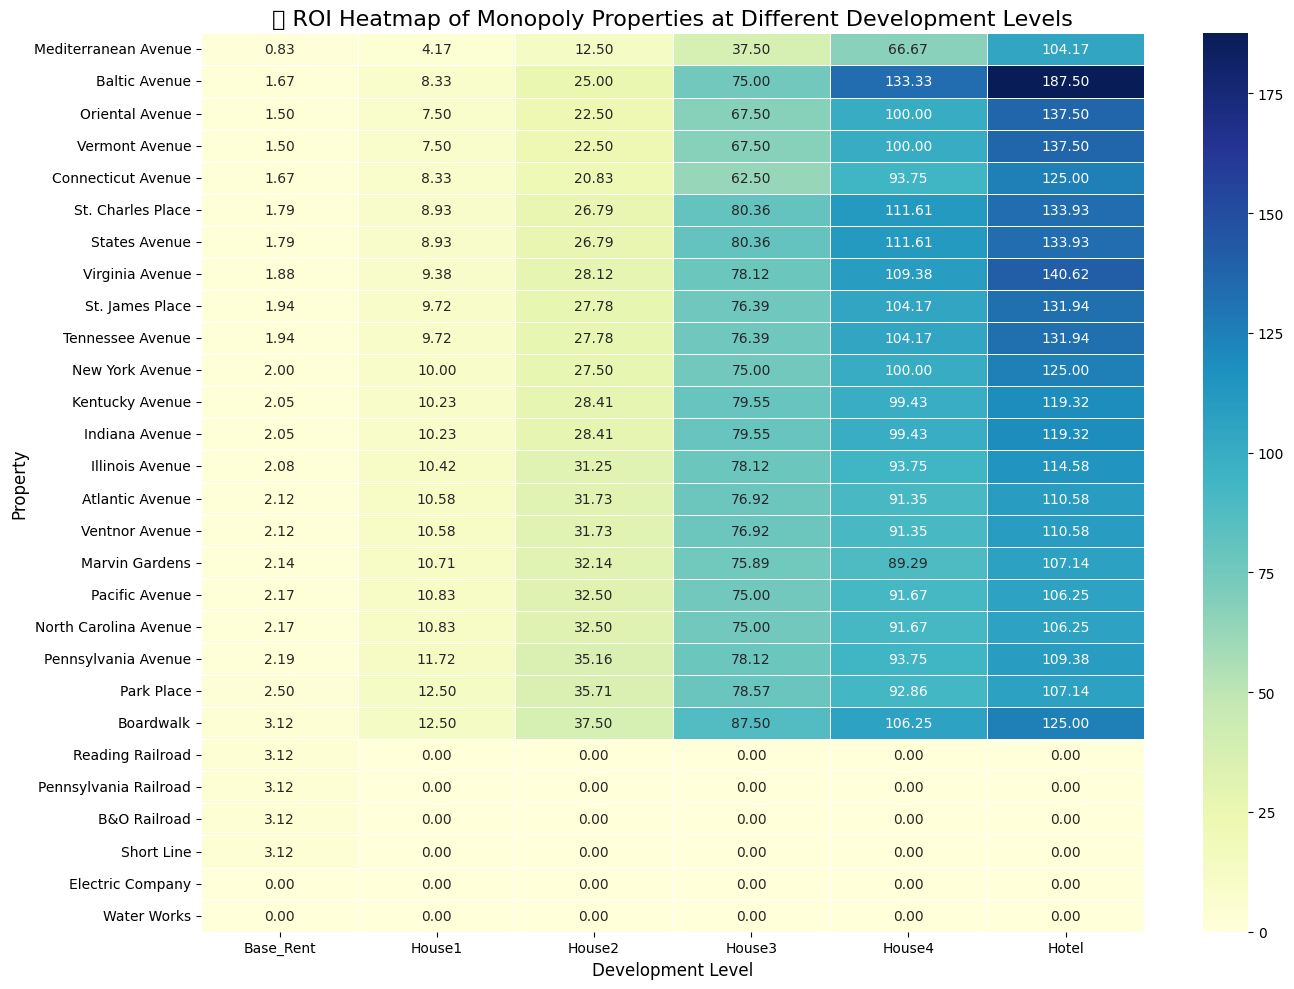

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'all_properties' already exists
properties = all_properties.copy()

# Dummy landing probabilities
landing_probs = {pos: 1/40 for pos in range(40)}  # Uniform for now
n_turns = 1000

# Fill missing values
properties["Base_Rent"] = properties["Base_Rent"].fillna(0)
for col in ["House1", "House2", "House3", "House4", "Hotel"]:
    properties[col] = properties[col].fillna(0)
properties["Cost"] = properties["Cost"].replace(0, 1)
properties["Landing_Prob"] = properties["Position"].map(lambda x: landing_probs.get(x, 0))

# Create a dataframe for ROI at each level
roi_data = pd.DataFrame()
levels = ["Base_Rent", "House1", "House2", "House3", "House4", "Hotel"]

for level in levels:
    expected_rent = properties[level] * properties["Landing_Prob"] * n_turns
    roi = expected_rent / properties["Cost"]
    roi_data[level] = roi

roi_data["Name"] = properties["Name"]
roi_data.set_index("Name", inplace=True)

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(roi_data[levels], cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)
plt.title("🏘️ ROI Heatmap of Monopoly Properties at Different Development Levels", fontsize=16)
plt.xlabel("Development Level", fontsize=12)
plt.ylabel("Property", fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load your game simulation data (adjust path as needed)
df_sim = pd.read_csv("monopoly_large_simulation.csv")

# Count landings on each position
landing_counts = df_sim["Position"].value_counts().sort_index()
landing_probs = landing_counts / landing_counts.sum()

# Map to property DataFrame
properties = all_properties.copy()
properties["Landing_Prob"] = properties["Position"].map(landing_probs).fillna(0)


In [ ]:
n_turns = 100  # Assuming 100 simulated turns

# ROI for base rent (no development)
properties["ROI_Base"] = (properties["Base_Rent"] * properties["Landing_Prob"] * n_turns) / properties["Cost"]

# ROI with 1–4 houses and hotel (only for buildable properties)
for i in range(1, 5):
    properties[f"ROI_House{i}"] = (properties[f"House{i}"] * properties["Landing_Prob"] * n_turns) / (properties["Cost"] + i * properties["House_Cost"])
properties["ROI_Hotel"] = (properties["Hotel"] * properties["Landing_Prob"] * n_turns) / (properties["Cost"] + 5 * properties["House_Cost"])


In [ ]:
def monte_carlo_recommend(player_cash, owned_props, properties_df):
    recs = []
    # Filter only unowned
    unowned = properties_df[~properties_df["Name"].isin(owned_props)]
    # Step 1: Recommend best buy based on base ROI
    best_buy = unowned.sort_values("ROI_Base", ascending=False).iloc[0]
    if player_cash >= best_buy["Cost"]:
        recs.append(f"💰 Buy {best_buy['Name']} — Highest ROI (Base): {best_buy['ROI_Base']:.2f}")

    # Step 2: Recommend building on top ROI-improving properties
    buildable = properties_df[properties_df["Name"].isin(owned_props) & (properties_df["Type"] == "Color")]
    for i in range(1, 5):
        best_build = buildable.sort_values(f"ROI_House{i}", ascending=False).head(1)
        for _, row in best_build.iterrows():
            if player_cash >= row["House_Cost"]:
                recs.append(f"🏠 Build House {i} on {row['Name']} — ROI: {row[f'ROI_House{i}']:.2f}")

    # Step 3: Recommend mortgaging low-ROI properties if cash < threshold
    if player_cash < 100:
        low_roi = properties_df[properties_df["Name"].isin(owned_props)].sort_values("ROI_Base").head(1)
        row = low_roi.iloc[0]
        recs.append(f"🏦 Mortgage {row['Name']} — Low ROI (Base): {row['ROI_Base']:.2f}")

    return recs or ["No Monte Carlo-based recommendations at this moment."]

# Example usage
player_cash = 300
owned_props = ["Virginia Avenue", "St. Charles Place"]
recommendations = monte_carlo_recommend(player_cash, owned_props, properties)

for r in recommendations:
    print(r)


💰 Buy Pennsylvania Railroad — Highest ROI (Base): 0.33
🏠 Build House 1 on Virginia Avenue — ROI: 0.59
🏠 Build House 2 on Virginia Avenue — ROI: 1.28
🏠 Build House 3 on Virginia Avenue — ROI: 2.79
🏠 Build House 4 on Virginia Avenue — ROI: 3.21


In [ ]:
# Assuming 'properties' is your DataFrame with Monopoly property info
# and 'landing_probs' was computed from simulation data

n_turns = 100  # Simulated turns

# Add Landing Probability (already from simulation)
properties["Landing_Prob"] = properties["Position"].map(landing_probs).fillna(0)

# Add ROI for base rent
properties["ROI_Base"] = (properties["Base_Rent"] * properties["Landing_Prob"] * n_turns) / properties["Cost"]

# Add ROI for developments (only where 'House1' etc. exist)
if all(col in properties.columns for col in ["House1", "House2", "House3", "House4", "Hotel", "House_Cost"]):
    for i in range(1, 5):
        properties[f"ROI_House{i}"] = (
            properties[f"House{i}"] * properties["Landing_Prob"] * n_turns
        ) / (properties["Cost"] + i * properties["House_Cost"])

    properties["ROI_Hotel"] = (
        properties["Hotel"] * properties["Landing_Prob"] * n_turns
    ) / (properties["Cost"] + 5 * properties["House_Cost"])
else:
    print("⚠️ Missing columns for house/hotel ROI computation.")


In [ ]:
def monte_carlo_recommend(player_cash, owned_props, properties_df):
    recs = []

    # Filter unowned properties
    unowned = properties_df[~properties_df["Name"].isin(owned_props)]

    # Recommend best buy based on ROI
    if "ROI_Base" in unowned.columns and not unowned.empty:
        best_buy = unowned.sort_values("ROI_Base", ascending=False).iloc[0]
        if player_cash >= best_buy["Cost"]:
            recs.append(f"💰 Buy {best_buy['Name']} — Highest ROI (Base): {best_buy['ROI_Base']:.2f}")

    # Recommend building
    buildable = properties_df[(properties_df["Name"].isin(owned_props)) & (properties_df["Type"] == "Color")]
    for i in range(1, 5):
        col_name = f"ROI_House{i}"
        if col_name in buildable.columns and not buildable.empty:
            best_build = buildable.sort_values(col_name, ascending=False).head(1)
            for _, row in best_build.iterrows():
                if player_cash >= row["House_Cost"]:
                    recs.append(f"🏠 Build House {i} on {row['Name']} — ROI: {row[col_name]:.2f}")

    # Recommend mortgage if low cash
    if player_cash < 100 and "ROI_Base" in properties_df.columns:
        low_roi = properties_df[properties_df["Name"].isin(owned_props)].sort_values("ROI_Base").head(1)
        if not low_roi.empty:
            row = low_roi.iloc[0]
            recs.append(f"🏦 Mortgage {row['Name']} — Low ROI (Base): {row['ROI_Base']:.2f}")

    return recs or ["No Monte Carlo-based recommendations at this moment."]


In [ ]:
player_cash = 300
owned_props = ["Virginia Avenue", "St. Charles Place"]

recommendations = monte_carlo_recommend(player_cash, owned_props, properties)

for rec in recommendations:
    print(rec)


💰 Buy Pennsylvania Railroad — Highest ROI (Base): 0.33
🏠 Build House 1 on Virginia Avenue — ROI: 0.59
🏠 Build House 2 on Virginia Avenue — ROI: 1.28
🏠 Build House 3 on Virginia Avenue — ROI: 2.79
🏠 Build House 4 on Virginia Avenue — ROI: 3.21


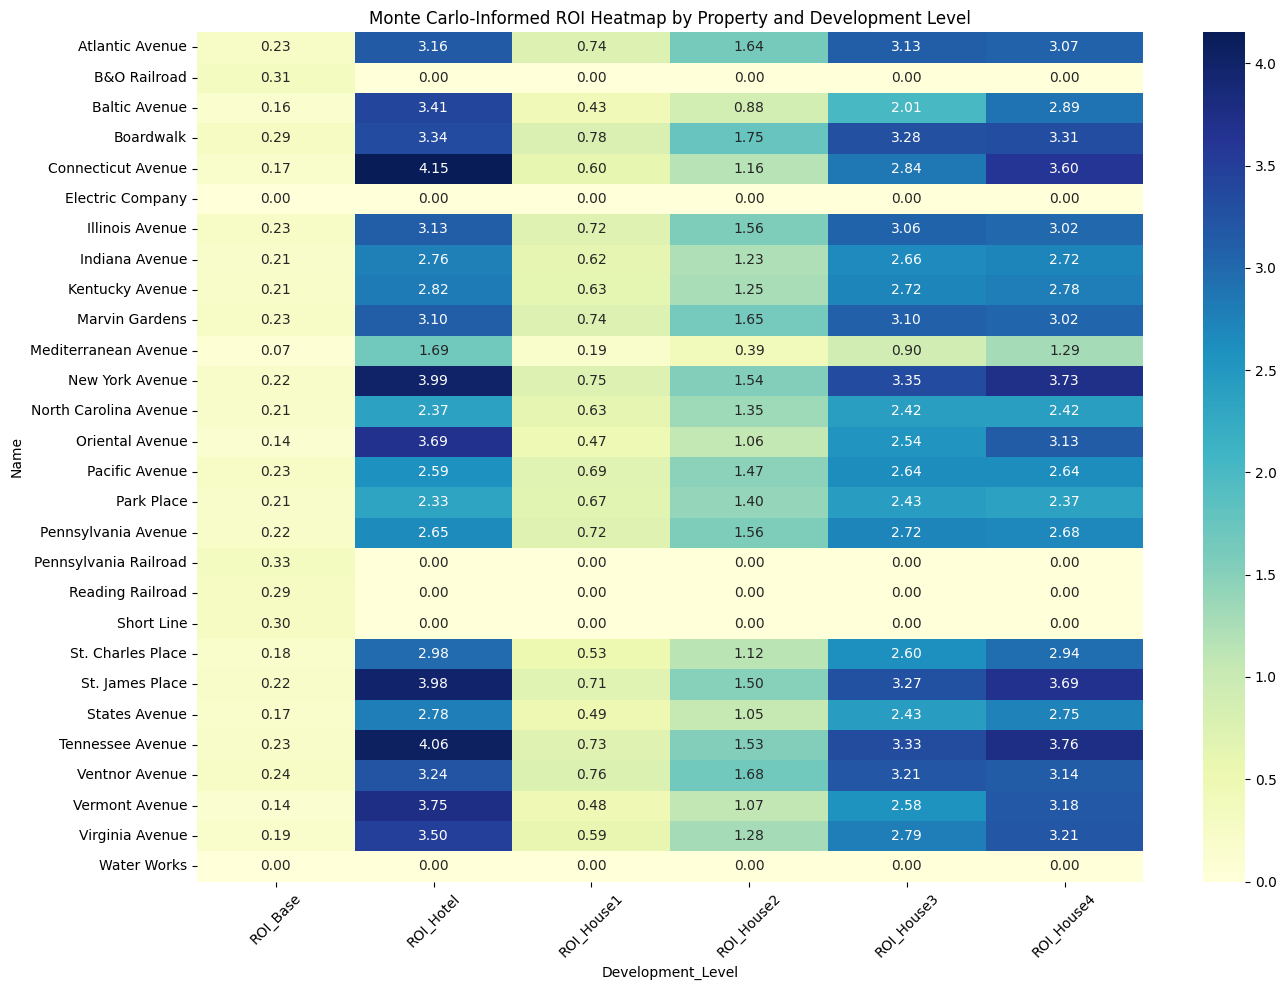

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the ROI columns to long format
roi_melted = properties.melt(
    id_vars=["Name", "Type"],
    value_vars=["ROI_Base", "ROI_House1", "ROI_House2", "ROI_House3", "ROI_House4", "ROI_Hotel"],
    var_name="Development_Level",
    value_name="ROI"
)

# Pivot for heatmap
roi_pivot = roi_melted.pivot(index="Name", columns="Development_Level", values="ROI")

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(roi_pivot, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Monte Carlo-Informed ROI Heatmap by Property and Development Level")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
def buy_skip_advice(position, player_cash, owned_props, properties_df, threshold=0.05):
    """Recommend whether to buy or skip a property the player lands on."""
    current_tile = properties_df[properties_df["Position"] == position]

    if current_tile.empty:
        return f"🚫 Position {position} is not a purchasable property."

    prop = current_tile.iloc[0]

    if prop["Name"] in owned_props:
        return f"🧱 You already own {prop['Name']}."

    roi = prop["ROI_Base"] if "ROI_Base" in prop else 0

    if player_cash < prop["Cost"]:
        return f"❌ Skip {prop['Name']} — Insufficient funds (${player_cash} < ${prop['Cost']})"

    if roi >= threshold:
        return f"✅ Buy {prop['Name']} — ROI: {roi:.2f} (above threshold)"
    else:
        return f"⚠️ Skip {prop['Name']} — ROI: {roi:.2f} (below threshold)"

# Example usage
player_position = 14  # Example: Virginia Avenue
player_cash = 300
owned_props = ["St. Charles Place"]

advice = buy_skip_advice(player_position, player_cash, owned_props, properties)
print(advice)


✅ Buy Virginia Avenue — ROI: 0.19 (above threshold)


In [ ]:
color_mapping = {
    "Mediterranean Avenue": "Brown",
    "Baltic Avenue": "Brown",
    "Oriental Avenue": "Light Blue",
    "Vermont Avenue": "Light Blue",
    "Connecticut Avenue": "Light Blue",
    "St. Charles Place": "Pink",
    "States Avenue": "Pink",
    "Virginia Avenue": "Pink",
    "St. James Place": "Orange",
    "Tennessee Avenue": "Orange",
    "New York Avenue": "Orange",
    "Kentucky Avenue": "Red",
    "Indiana Avenue": "Red",
    "Illinois Avenue": "Red",
    "Atlantic Avenue": "Yellow",
    "Ventnor Avenue": "Yellow",
    "Marvin Gardens": "Yellow",
    "Pacific Avenue": "Green",
    "North Carolina Avenue": "Green",
    "Pennsylvania Avenue": "Green",
    "Park Place": "Dark Blue",
    "Boardwalk": "Dark Blue",
    "Reading Railroad": "Railroad",
    "Pennsylvania Railroad": "Railroad",
    "B&O Railroad": "Railroad",
    "Short Line": "Railroad",
    # Add Utilities if needed
    "Electric Company": "Utility",
    "Water Works": "Utility"
}

# Apply the mapping
properties["Set_Color"] = properties["Name"].map(color_mapping)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def recommend_monopoly_action(cash, position, owned_props, opponents_props, properties_df):
    recommendations = []
    current_tile = properties_df[properties_df["Position"] == position]

    if current_tile.empty:
        recommendations.append("🎲 You're not on a property — no direct action.")
    else:
        prop = current_tile.iloc[0]
        prop_name = prop["Name"]
        prop_cost = prop["Cost"]
        base_roi = prop.get("ROI_Base", 0)

        # --- BUY ---
        if prop_name not in owned_props and all(prop_name not in v for v in opponents_props.values()):
            if cash >= prop_cost:
                recommendations.append(f"💰 Buy '{prop_name}' — Available, high ROI: {base_roi:.2f}, cost: ${prop_cost}")
            else:
                recommendations.append(f"❌ Can't buy '{prop_name}' — Insufficient cash (${cash} < ${prop_cost})")

        # --- BUILD ---
        color_group = prop.get("Set_Color", "")
        if color_group:
            # Find if the player owns the whole color set
            player_color_props = properties_df[properties_df["Set_Color"] == color_group]
            owned_in_set = player_color_props["Name"].isin(owned_props).sum()
            total_in_set = len(player_color_props)

            if owned_in_set == total_in_set:
                if cash >= 50:  # Simplified build threshold
                    recommendations.append(f"🏗️ Build houses on '{color_group}' set — Full set owned, ROI improves greatly.")
                else:
                    recommendations.append(f"⚠️ Build skipped — Full set owned, but not enough cash to build.")

        # --- MORTGAGE ---
        if cash < 100:
            low_roi_props = properties_df[properties_df["Name"].isin(owned_props)].sort_values("ROI_Base")
            if not low_roi_props.empty:
                prop_to_mortgage = low_roi_props.iloc[0]
                recommendations.append(f"🏦 Mortgage '{prop_to_mortgage['Name']}' — Low ROI and cash below $100.")

        # --- TRADE ---
        for opp_id, opp_list in opponents_props.items():
            for opp_prop in opp_list:
                opp_row = properties_df[properties_df["Name"] == opp_prop]
                if not opp_row.empty and opp_row.iloc[0]["Set_Color"] == color_group:
                    needed = player_color_props[~player_color_props["Name"].isin(owned_props)]
                    if not needed.empty:
                        recommendations.append(f"🤝 Consider trading with Player {opp_id} for '{opp_prop}' to complete '{color_group}' set.")

    return recommendations


In [ ]:
# Inputs
player_cash = 250
player_position = 6  # Suppose it's Oriental Avenue
owned_props = ["Baltic Avenue", "Boardwalk"]
opponents_props = {
    1: ["Vermont Avenue", "Park Place"],
    2: ["Marvin Gardens", "Illinois Avenue"]
}

recommendations = recommend_monopoly_action(player_cash, player_position, owned_props, opponents_props, properties)
for r in recommendations:
    print(r)


💰 Buy 'Oriental Avenue' — Available, high ROI: 0.14, cost: $100
🤝 Consider trading with Player 1 for 'Vermont Avenue' to complete 'Light Blue' set.
